

# **Stock Price Prediction using FbProphet (MSFT)**





# 1.   Installing prophet and yfinance



In [ ]:
!pip install prophet       #https://facebook.github.io/prophet/docs/quick_start.html#python-api
!pip install yfinance



# 2.   Importing Libraries



In [24]:
import warnings;
warnings.simplefilter('ignore')
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import pandas as pd
import yfinance as yf
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error



# 3.   Data preparation



In [25]:
df=yf.Ticker('MSFT').history('10y')[['Close']]
df.head()

,Close
Date,
2012-07-30,24.200718
2012-07-31,24.061909
2012-08-01,24.012928
2012-08-02,23.833300
2012-08-03,24.290527


In [26]:
df.describe()

,Close
count,2517.000000
mean,108.282877
std,88.635760
min,21.851532
25%,39.519844
50%,68.175034
75%,155.302582
max,341.606384


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2012-07-30 to 2022-07-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2517 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [28]:
df.reset_index(inplace=True)
df.head()

,Date,Close
0,2012-07-30,24.200718
1,2012-07-31,24.061909
2,2012-08-01,24.012928
3,2012-08-02,23.833300
4,2012-08-03,24.290527


In [29]:
df.rename(columns={'Date':'ds','Close':'y'},inplace=True)
df.head()

,ds,y
0,2012-07-30,24.200718
1,2012-07-31,24.061909
2,2012-08-01,24.012928
3,2012-08-02,23.833300
4,2012-08-03,24.290527


In [30]:
X_train=df[0:2200]
X_test=df[2200:]



# 4.   FbProphet Model



In [ ]:
m=Prophet(interval_width=0.99,daily_seasonality=True)
model=m.fit(X_train)

In [32]:
X_train_predicted=m.predict(X_train)

In [33]:
plot_plotly(m, X_train_predicted)

In [34]:
mape=mean_absolute_percentage_error
mse=mean_squared_error

In [35]:
 print('mape train = ',mape(X_train['y'],X_train_predicted['yhat']),' mse train = ',mse(X_train['y'],X_train_predicted['yhat']))

mape train =  0.04147444713546672  mse train =  19.761432065669442


In [36]:
X_test_predicted=m.predict(X_test)

In [37]:
print('mape test = ',mape(X_test['y'],X_test_predicted['yhat']),' mse test = ',mse(X_test['y'],X_test_predicted['yhat']))

mape test =  0.09976755334532492  mse test =  1310.7308482152569




# 5.   Forecasting



In [38]:
future=m.make_future_dataframe(periods=365,freq='b',include_history=True)  #b: buisiness day
forecast=m.predict(future)
forecast[['ds','yhat']]

,ds,yhat
0,2012-07-30,24.987858
1,2012-07-31,24.979828
2,2012-08-01,24.910039
3,2012-08-02,24.823604
4,2012-08-03,24.806305
...,...,...
2560,2022-09-14,340.543094
2561,2022-09-15,340.566811
2562,2022-09-16,340.666171
2563,2022-09-19,340.776747


In [39]:
plot_plotly(m, forecast)

In [40]:
plot_components_plotly(m,forecast)

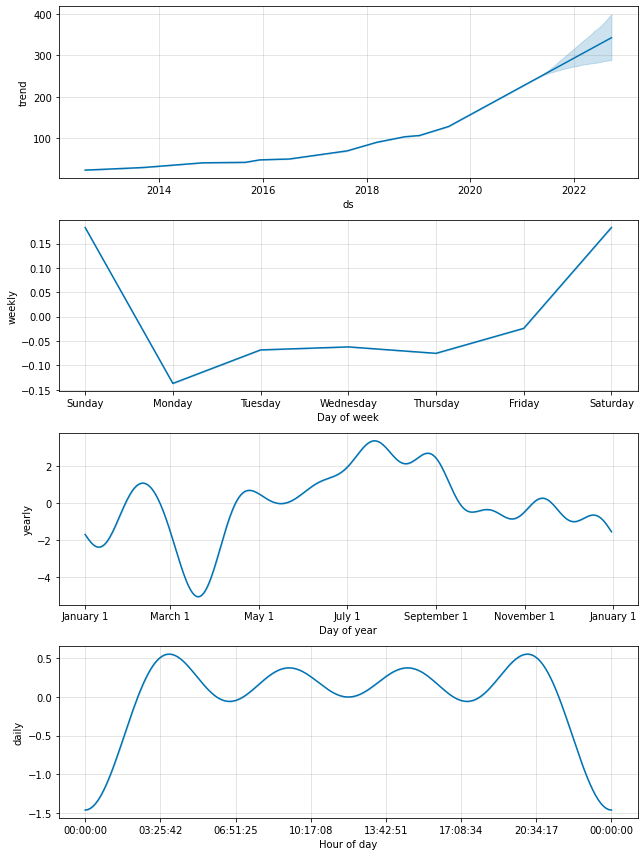

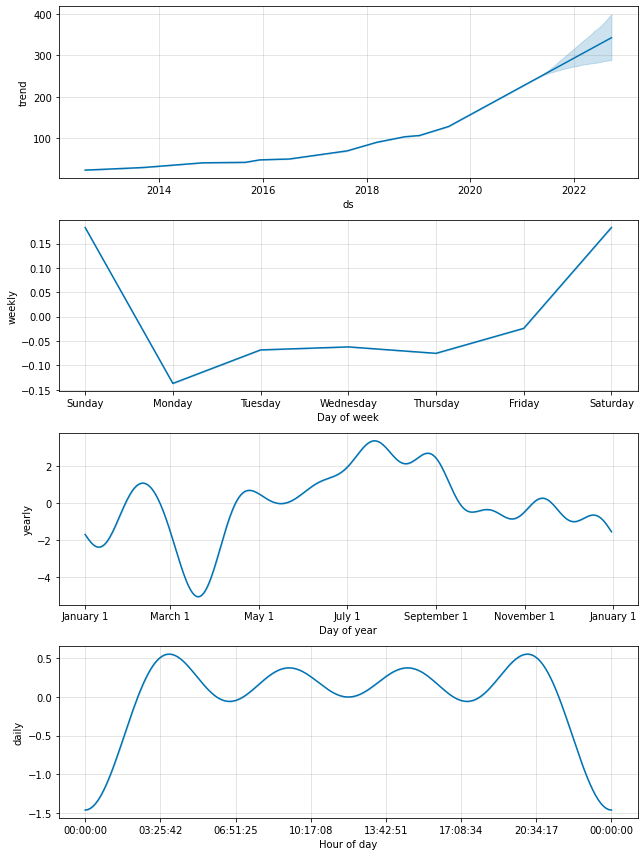

In [41]:
m.plot_components(forecast)



# 6.   Saving Model



In [42]:
from prophet.serialize import model_to_json, model_from_json

with open('fbprophet_model_msft.json', 'w') as fout:
    fout.write(model_to_json(m))  # Save model

In [43]:
with open('fbprophet_model_msft.json', 'r') as fin:
    m = model_from_json(fin.read())  # Load model



# 7.   Downloading the forecast Data



In [44]:
from google.colab import files
forecast.to_csv('forecast_msft.csv')
files.download('forecast_msft.csv')
 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>